In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
import geone
import geone.covModel as gcm
import geone.deesseinterface as dsi
import pyvista as pv

sys.path.append("../../../../")
import ArchPy
from ArchPy.base import Unit, Pile, Prop, Facies, Surface

In [2]:
TI = geone.img.readImageGslib("MPS_data/ti3DC.gslib")

In [3]:
geone.imgplot3d.drawImage3D_surface(TI)

Widget(value="<iframe src='http://localhost:55149/index.html?ui=P_0x278d070fd50_0&reconnect=auto' style='width…

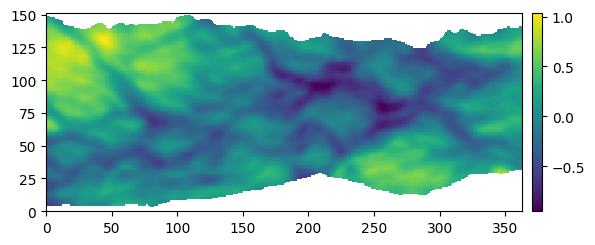

In [3]:
# Training image
TI_topo = geone.img.readImageGslib("MPS_data/ti2D_topo.gslib", missing_value=-9999999)  # gather the training image
geone.imgplot.drawImage2D(TI_topo)  # plot it

In [4]:
ref = geone.img.readImageGslib("MPS_data/im3DRef.gslib")

In [5]:
ref

*** Img object ***
name = 'MPS_data/im3DRef.gslib'
(nx, ny, nz) = (120, 80, 50) # number of cells along each axis
(sx, sy, sz) = (1.0, 1.0, 0.2) # cell size (spacing) along each axis
(ox, oy, oz) = (0.0, 0.0, -10.0) # origin (coordinates of bottom-lower-left corner)
nv = 4  # number of variable(s)
varname = ['facies', 'layer', 'azimuth', 'dip']
val: (4, 50, 80, 120)-array
*****

In [7]:
geone.imgplot3d.drawImage3D_surface(ref)

Widget(value="<iframe src='http://localhost:55149/index.html?ui=P_0x278d8c0ef90_1&reconnect=auto' style='width…

In [6]:
# grid

sx = 1
sy = 1
sz = 0.25
x0 = 0
y0 = 0
z0 = -15
nx = 80
ny = 120
nz = 60

dimensions = (nx, ny, nz)
spacing = (sx, sy, sz)
origin = (x0, y0, z0)  

In [15]:

#create Units 

# Unit D
dic_f_D = {"f_method" : "homogenous"}  # DeeSse parameters
D = Unit(name="D",order=1, ID = 1, color="gold", contact="onlap",
         surface=Surface(contact="onlap"),dic_facies=dic_f_D)

# Unit C
dic_s_C_mps = {"int_method" : "MPS", "TI" : TI_topo,"TargetMin":-12, "TargetMax": 2, "rescalingMode":"min_max",
          "thresh":0.01,"maxscan":0.1}
dic_f_C = {"f_method" : "MPS", "TI":TI, "xr":1, "yr":1, "zr":.7, "maxscan":0.005, "thresh":0.01,
           "rot_usage":1,
           "rotAzi":"inference", "rotAziLoc":True, "azi_top":0, "azi_bot":"gradient",  # azimuth
           "rotDip":"inference", "rotDipLoc":True, "dip_top":80, "dip_bot":"gradient",  # dip
           "neig":12}  # DeeSse parameters

C = Unit(name="C",order=2, ID = 2, color="midnightblue", contact="onlap",
         dic_facies=dic_f_C, surface=Surface(dic_surf=dic_s_C_mps, contact="erode"))

# Unit B
dic_s_B_mps = {"int_method" : "MPS", "TI" : TI_topo,"TargetMin":-14, "TargetMax": 0, "rescalingMode":"min_max",
          "thresh":0.01,"maxscan":0.1}
B = Unit(name="B",order=3, ID = 3, color="green",contact="onlap",
         dic_facies=dic_f_C.copy(), surface=Surface(contact="erode", dic_surf=dic_s_B_mps))

# Unit A
dic_s_A_mps = {"int_method" : "MPS", "TI" : TI_topo,"TargetMin":-18, "TargetMax": -5, "rescalingMode":"min_max",
          "thresh":0.01,"maxscan":0.1}
dic_f_A = {"f_method" : "homogenous"} 
A = Unit(name="A",order=4, ID = 4, color="lightcoral",contact="onlap",
         dic_facies=dic_f_A, surface=Surface(dic_surf = dic_s_A_mps, contact="onlap"))

Unit D: Surface added for interpolation
Unit C: TI added
Unit C: Surface added for interpolation
Unit B: TI added
Unit B: Surface added for interpolation
Unit A: Surface added for interpolation


In [16]:
#Master pile
P1 = Pile("P1")
P1.add_unit([D, C, B, A])

Stratigraphic unit D added
Stratigraphic unit C added
Stratigraphic unit B added
Stratigraphic unit A added


In [17]:
# facies
f5 = Facies(5, "clay", "lightcoral")
f1 = Facies(1, "silt-matrix", "bisque")
f2 = Facies(3, "sand", "orangered")
f3 = Facies(2, "open-gravel", "royalblue")
f4 = Facies(4, "silts", "gold")

A.add_facies(f5)
B.add_facies([f1, f2, f3])
C.add_facies([f1, f2, f3])
D.add_facies(f4)

Facies clay added to unit A
Facies silt-matrix added to unit B
Facies sand added to unit B
Facies open-gravel added to unit B
Facies silt-matrix added to unit C
Facies sand added to unit C
Facies open-gravel added to unit C
Facies silts added to unit D


In [18]:
#We must create an ArchTable object and set a Pile master (first pile)
T1 = ArchPy.base.Arch_table(name = "Exo2",seed=10, working_directory = "ws_article")
T1.set_Pile_master(P1)
T1.add_grid(dimensions, spacing, origin) #add grid

Pile sets as Pile master
## Adding Grid ##
## Grid added and is now simulation grid ##


In [19]:
T1.process_bhs()

##### ORDERING UNITS ##### 
Pile P1: ordering units
Stratigraphic units have been sorted according to order
hierarchical relations set
No borehole found - no hd extracted


In [20]:
T1.compute_surf(1)

Boreholes not processed, fully unconditional simulations will be tempted
########## PILE P1 ##########
Pile P1: ordering units
Stratigraphic units have been sorted according to order

#### COMPUTING SURFACE OF UNIT A
DeeSse running... [VERSION 3.2 / BUILD NUMBER 20230616 / OpenMP 15 thread(s)]
DeeSse run complete

Warnings encountered (1 times in all):
#  1: WARNING 00010: a variable in a training image is not exhaustively informed
A: time elapsed for computing surface 0.17914509773254395 s

#### COMPUTING SURFACE OF UNIT B
DeeSse running... [VERSION 3.2 / BUILD NUMBER 20230616 / OpenMP 15 thread(s)]
DeeSse run complete

Warnings encountered (1 times in all):
#  1: WARNING 00010: a variable in a training image is not exhaustively informed
B: time elapsed for computing surface 0.18016409873962402 s

#### COMPUTING SURFACE OF UNIT C
DeeSse running... [VERSION 3.2 / BUILD NUMBER 20230616 / OpenMP 15 thread(s)]
DeeSse run complete

Warnings encountered (1 times in all):
#  1: WARNING 00010

In [21]:
T1.plot_units(0, excludedVal=[0])

Widget(value="<iframe src='http://localhost:55534/index.html?ui=P_0x1c8622cd0d0_1&reconnect=auto' style='width…

In [22]:
T1.compute_facies(1, verbose_methods=3)


### Unit D: facies simulation with homogenous method ####
### Unit D - realization 0 ###
Time elapsed 0.01 s

### Unit C: facies simulation with MPS method ####
### Unit C - realization 0 ###
DeeSse running... [VERSION 3.2 / BUILD NUMBER 20230616 / OpenMP 15 thread(s)]
DeeSse run complete
Time elapsed 24.04 s

### Unit B: facies simulation with MPS method ####
### Unit B - realization 0 ###
DeeSse running... [VERSION 3.2 / BUILD NUMBER 20230616 / OpenMP 15 thread(s)]
DeeSse run complete
Time elapsed 17.02 s

### Unit A: facies simulation with homogenous method ####
### Unit A - realization 0 ###
Time elapsed 0.0 s

### 41.07: Total time elapsed for computing facies ###


In [23]:
T1.plot_facies()

Widget(value="<iframe src='http://localhost:55534/index.html?ui=P_0x1c86160a710_2&reconnect=auto' style='width…

In [24]:
np.random.seed(15)
nbh = 50
pos_x = np.random.random(nbh) * T1.xg[-1]
pos_y = np.random.random(nbh) * T1.yg[-1]

boreholes = T1.make_fake_bh(pos_x, pos_y)[0][0]

In [25]:
ID = 1

for i in boreholes:
    
    i.ID = ID
    ID += 1

In [26]:
import copy
T1_copy = copy.deepcopy(T1)

T1_copy.add_bh(boreholes)

Borehole 1 goes below model limits, borehole 1 depth cut
Borehole 1 added
Borehole 2 goes below model limits, borehole 2 depth cut
Borehole 2 added
Borehole 3 goes below model limits, borehole 3 depth cut
Borehole 3 added
Borehole 4 goes below model limits, borehole 4 depth cut
Borehole 4 added
Borehole 5 goes below model limits, borehole 5 depth cut
Borehole 5 added
Borehole 6 goes below model limits, borehole 6 depth cut
Borehole 6 added
Borehole 7 goes below model limits, borehole 7 depth cut
Borehole 7 added
Borehole 8 goes below model limits, borehole 8 depth cut
Borehole 8 added
Borehole 9 goes below model limits, borehole 9 depth cut
Borehole 9 added
Borehole 10 goes below model limits, borehole 10 depth cut
Borehole 10 added
Borehole 11 goes below model limits, borehole 11 depth cut
Borehole 11 added
Borehole 12 goes below model limits, borehole 12 depth cut
Borehole 12 added
Borehole 13 goes below model limits, borehole 13 depth cut
Borehole 13 added
Borehole 14 goes below mod

In [27]:
ArchPy.inputs.write_bh_files(T1_copy)

('Exo2.lbh', 'Exo2.ud', 'Exo2.fd')

In [28]:
import shutil
for file in os.listdir(T1_copy.ws):
    if file.split(".")[-1][:3] != "ipy":
        shutil.copyfile(os.path.join(T1_copy.ws, file), os.path.join("MPS_data", file))
        os.remove(os.path.join(T1_copy.ws, file))

In [29]:
T1.get_all_facies()

[silts, silt-matrix, sand, open-gravel, clay]